In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
real_df = pd.read_csv("Data/Real_Datasets/wine_processed.csv")
tabsyn_df = pd.read_csv("Data/Synthetic_Datasets/Tabsyn/tabsyn.csv")

In [3]:
print("Real Data:")
display(real_df.head())

print("TabSyn Synthetic Data:")
display(tabsyn_df.head())

Real Data:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.135767    -2.192833       -0.815173   0.624554   
1       0.451036          3.012817    -2.192833       -0.498175   1.281999   
2       0.451036          2.438032    -1.917553       -0.625740   1.104012   
3       3.073817         -0.337109     1.661085       -0.815173   0.594352   
4       0.142473          2.135767    -2.192833       -0.815173   0.624554   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.193601             -1.463348  1.034993  1.813090   0.193097   
1            -0.013944             -0.513260  0.701486 -0.115073   0.999579   
2            -0.754684             -0.816778  0.768188  0.258120   0.797958   
3            -0.574982             -0.668662  1.101694 -0.363868   0.327510   
4            -1.193601             -1.463348  1.034993  1.813090   0.193097   

    alcohol   quality type  
0 -0.915464 -0.937230  red  
1 -0.580068 -0.937230  red  
2 -0.580068 -0.937230  red  
3 -0.580068  0.207999  red  
4 -0.915464 -0.937230  red

TabSyn Synthetic Data:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.745076          0.381340     1.502604       -0.815173   5.066594   
1      -0.728467         -1.120155    -0.128234       -0.338464  -0.135726   
2      -0.474652          0.653093    -0.816526       -0.919937   0.464239   
3       2.653587          1.497842    -0.128234       -0.587367   0.714993   
4      -0.243230         -0.405457     2.163766        0.628487   0.439241   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -2.251138             -2.374085  0.793086 -0.550465   1.995953   
1             0.439574              0.476366 -1.389595  0.009325  -1.328806   
2            -0.709370             -0.347886  0.279546  0.382517   3.462976   
3            -0.619864             -0.889166  0.901590  0.054427   0.663545   
4             1.411566              0.906205  0.301279 -0.861459  -0.613385   

    alcohol   quality   type  
0 -0.496219 -0.937230    red  
1  1.180761  1.353228  white  
2  0.342271  1.353228    red  
3  0.426120  1.353228    red  
4 -0.970730 -0.937230  white

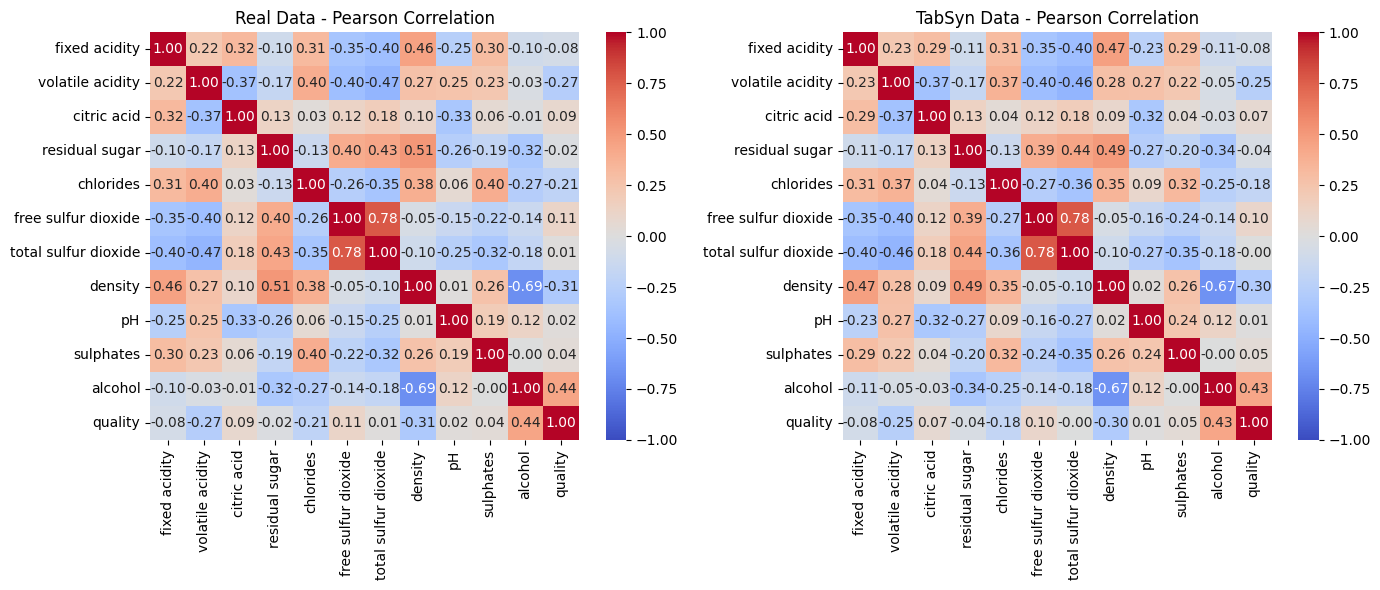

In [35]:
real_num = real_df.select_dtypes(include='number')
tabsyn_num = tabsyn_df.select_dtypes(include='number')

real_pearson = real_num.corr(method='pearson')
tabsyn_pearson = tabsyn_num.corr(method='pearson')

plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.heatmap(real_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Real Data - Pearson Correlation')

# Synthesized data
plt.subplot(1, 2, 2)
sns.heatmap(tabsyn_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('TabSyn Data - Pearson Correlation')

plt.tight_layout()
plt.show()


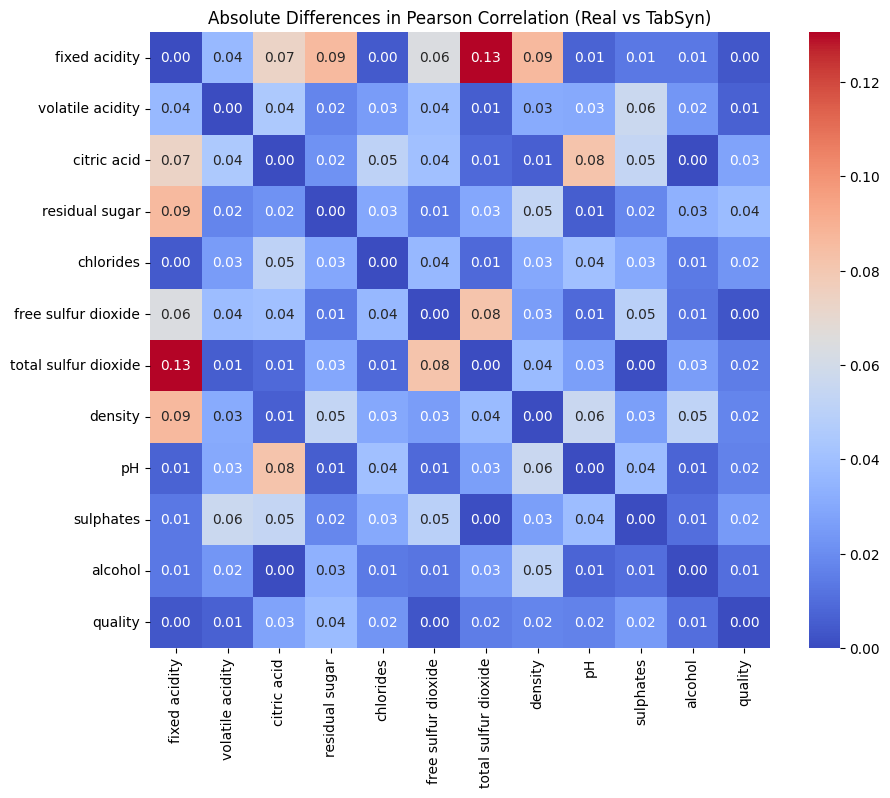

In [36]:
diff_TabSyn = (real_pearson - tabsyn_pearson).abs()
plt.figure(figsize=(10, 8))
sns.heatmap(diff_matrix_pearson, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Absolute Differences in Pearson Correlation (Real vs TabSyn)")
plt.show()

In [37]:
# Compute absolute differences (you already have diff_df)
abs_diff = diff_TabSyn.abs()

# Mean absolute difference (off-diagonal)
vals = abs_diff.values[np.triu_indices_from(abs_diff, k=1)]
print("Mean absolute Pearson diff:", round(vals.mean(), 3))

# Find top 3 biggest drifts
pairs = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    pairs.append((abs_diff.iloc[i, j], diff_TabSyn.columns[i], diff_TabSyn.columns[j]))
top3 = sorted(pairs, reverse=True)[:3]
print("Top 3 biggest correlation shifts:")
for diff, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {diff:.2f}")


Mean absolute Pearson diff: 0.013
Top 3 biggest correlation shifts:
  'chlorides' vs 'sulphates': Δ = 0.07
  'pH' vs 'sulphates': Δ = 0.05
  'chlorides' vs 'pH': Δ = 0.04


As shown in the difference matrix, the biggest difference in Pearson correlation exists between sulfates and chlorides, which is 0.07. Now, to gain a better insight, the next step is to visually inspect and see the scatter plots for the relation between sulfates and chlorides.

Visual inspection for Sulfates and Chlorides

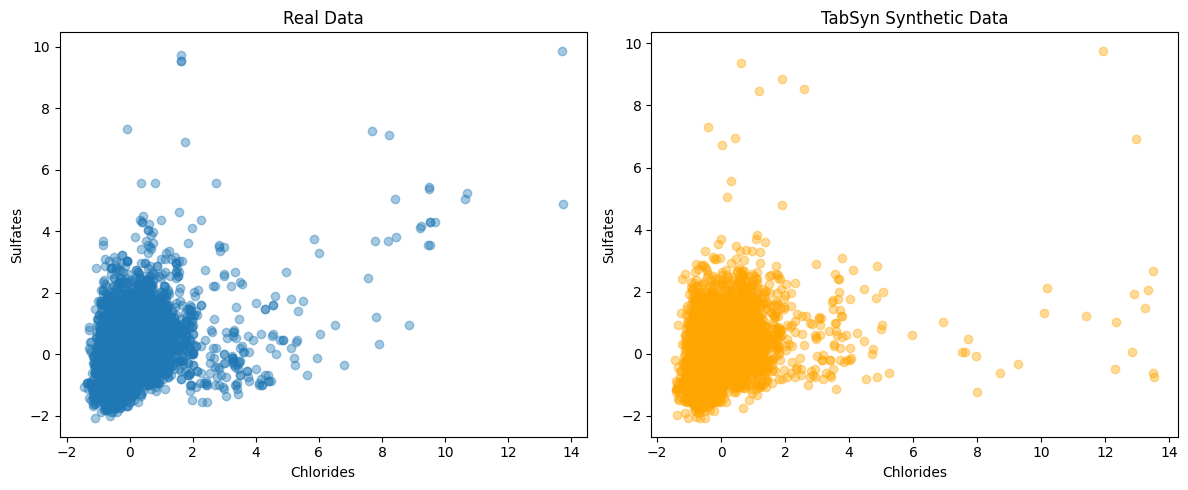

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(real_df["chlorides"], real_df["sulphates"], alpha=0.4)
axes[0].set_title("Real Data")
axes[0].set_xlabel("Chlorides")
axes[0].set_ylabel("Sulfates")

axes[1].scatter(tabsyn_df["chlorides"], tabsyn_df["sulphates"], alpha=0.4, color='orange')
axes[1].set_title("TabSyn Synthetic Data")
axes[1].set_xlabel("Chlorides")
axes[1].set_ylabel("Sulfates")

plt.tight_layout()
plt.show()

In the real data plot, most data is densely clustered in an oval shape near the origin with a slight upward spread that shows a moderate positive correlation. There a only a few outliers.
In the synthetic data, the upward cluster is well preserved, however, it is slightly more dispersed and has more extreme outliers, which weakens the linear relationship. 